In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pyarrow

# Load the Data

In [94]:
#load the data

#load the users along with their interests
user_interest = pd.read_feather("data/user_interest")

#load the interests along with the word embeddings
interests_alone = pd.read_feather("data/interest_mapping")

#load the interests with occurance count and embeddings
interest_count = pd.read_feather("data/user_interest_embedding")

#load the user level data
user_df = pd.read_feather("data/user_df")

# Data Exploration

## Frequency Distribution

Text(0.5, 1.0, 'Ranking vs. Occurrence Percentage')

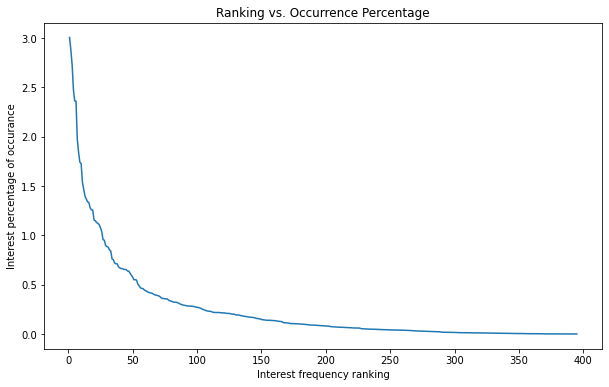

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(interest_count['RANKING'], interest_count['OCCURANCE_PERCENTAGE'])
plt.xlabel('Interest frequency ranking', fontsize=10)
plt.ylabel('Interest percentage of occurance', fontsize=10)
plt.title('Ranking vs. Occurrence Percentage')

## Top Interests

Top 10 Interests Overall

In [55]:
interest_count.head(10)

,INTEREST_ID,INTEREST_NAME_x,OCCURENCE_FREQUENCY,OCCURANCE_PERCENTAGE,RANKING,tokenized_interest,avg_embedding,check_embd
0,504,Museums & galleries,2958,3.006067,1,"[museums, galleries]","[0.16845703125, 0.12109375, -0.0048828125, 0.3...",False
1,301,Art,2835,2.881068,2,[art],"[0.0233154296875, -0.06396484375, 0.0055236816...",False
2,508,Pubs,2684,2.727615,3,[pubs],"[0.140625, -0.03857421875, 0.1328125, 0.503906...",False
3,501,Gigs,2437,2.476601,4,[gigs],"[0.29296875, 0.053466796875, -0.314453125, 0.2...",False
4,304,Photography,2325,2.362781,5,[photography],"[0.00180816650390625, 0.056396484375, -0.08300...",False
5,604,Cooking,2324,2.361765,6,[cooking],"[-0.1416015625, 0.25390625, 0.05224609375, 0.1...",False
6,307,Dancing,1944,1.975590,7,[dancing],"[0.171875, -0.2255859375, 0.2177734375, 0.2138...",False
7,404,Gym,1812,1.841445,8,[gym],"[-0.031494140625, 0.13671875, 0.049072265625, ...",False
8,1117,Foodie,1714,1.741852,9,[foodie],"[-0.2236328125, -0.255859375, 0.080078125, 0.3...",False
9,1201,Beaches,1700,1.727625,10,[beaches],"[0.26171875, 0.1201171875, 0.0830078125, -0.01...",False


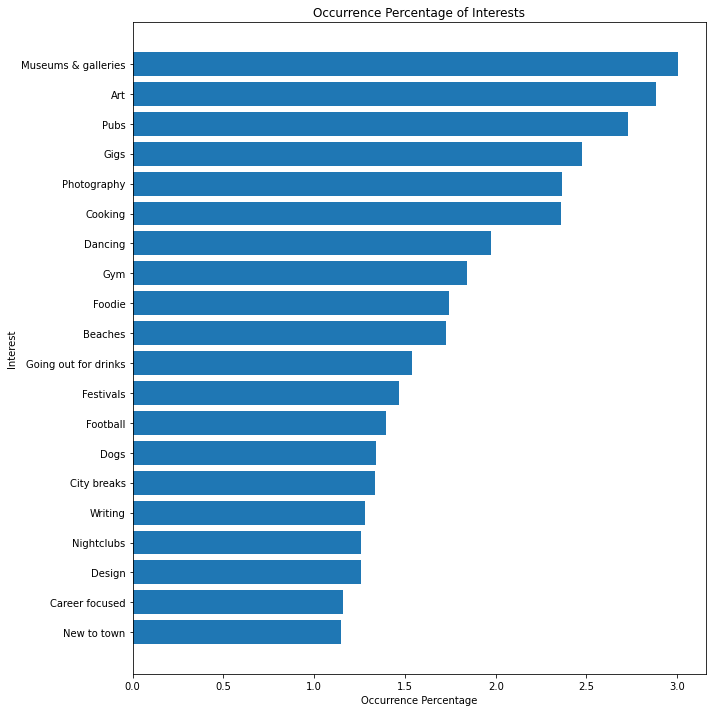

In [56]:
# Sort the DataFrame by 'Occurance_Percentage' in descending order
sorted_interests = interest_count.head(20).sort_values('OCCURANCE_PERCENTAGE', ascending=True)

# Set the figure size to accommodate all the interests
plt.figure(figsize=(10, len(sorted_interests) * 0.5))

# Plot the horizontal bar chart
plt.barh(sorted_interests['INTEREST_NAME_x'], sorted_interests['OCCURANCE_PERCENTAGE'])

# Set labels and title
plt.xlabel('Occurrence Percentage')
plt.ylabel('Interest')
plt.title('Occurrence Percentage of Interests')

# Adjust the spacing between the bars
plt.tight_layout()

# Display the plot
plt.show()

User Interest by Gender

In [57]:
#user interests by gender
#count the occurance of each interest
interest_count_f = user_interest.groupby(['INTEREST_ID', 'INTEREST_NAME', 'PROFILE_GENDER']).size().reset_index(name='OCCURENCE_FREQUENCY')

#female interests
f_interests = interest_count_f[interest_count_f['PROFILE_GENDER'] == 'F']
f_interests = f_interests.sort_values(by='OCCURENCE_FREQUENCY', ascending=False).reset_index().reset_index()
f_interests = f_interests.drop('index', axis=1)
f_interests.head(10)

,level_0,INTEREST_ID,INTEREST_NAME,PROFILE_GENDER,OCCURENCE_FREQUENCY
0,0,504,Museums & galleries,F,1876
1,1,301,Art,F,1817
2,2,501,Gigs,F,1481
3,3,307,Dancing,F,1380
4,4,508,Pubs,F,1221
5,5,304,Photography,F,1166
6,6,1117,Foodie,F,1131
7,7,604,Cooking,F,1112
8,8,1201,Beaches,F,1060
9,9,2504,Going out for drinks,F,1031


In [58]:
#male interests

#count the occurance of each interest
interest_count_m = user_interest.groupby(['INTEREST_ID', 'INTEREST_NAME', 'PROFILE_GENDER']).size().reset_index(name='OCCURENCE_FREQUENCY')

m_interests = interest_count_m[interest_count_m['PROFILE_GENDER'] == 'M']
m_interests = m_interests.sort_values(by='OCCURENCE_FREQUENCY', ascending=False).reset_index().reset_index()
m_interests = m_interests.drop('index', axis=1)
m_interests.head(10)

,level_0,INTEREST_ID,INTEREST_NAME,PROFILE_GENDER,OCCURENCE_FREQUENCY
0,0,508,Pubs,M,1463
1,1,604,Cooking,M,1212
2,2,304,Photography,M,1159
3,3,405,Football,M,1135
4,4,404,Gym,M,1088
5,5,504,Museums & galleries,M,1082
6,6,301,Art,M,1018
7,7,501,Gigs,M,956
8,8,601,Video games,M,846
9,9,503,Festivals,M,673


Top Interest by age

In [59]:
# Group the dataframe by AgeLabel and count the occurrences of each interest
top_interests = user_interest.groupby('AgeLabel')['INTEREST_NAME'].value_counts().groupby(level=0).nlargest(10)

# Reset the index to convert the multi-index series to a dataframe
top_interests = top_interests.reset_index(level=0, drop=True).reset_index()

top_interests.head(50)

,AgeLabel,INTEREST_NAME,count
0,18-24,Museums & galleries,717
1,18-24,Art,713
2,18-24,Gym,625
3,18-24,Pubs,620
4,18-24,Photography,598
5,18-24,Gigs,583
6,18-24,Nightclubs,557
7,18-24,Cooking,548
8,18-24,Coffee,406
9,18-24,Video games,404


## Distribution of Listed Interests

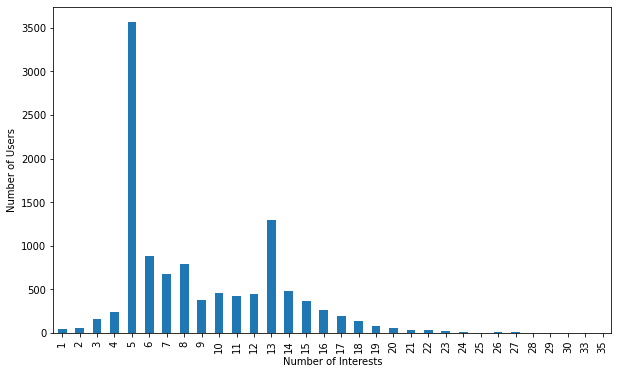

In [60]:
#interests per person
interests = user_interest.groupby(['USER_ID'])['INTEREST_ID'].count().reset_index(name='INTEREST_COUNT')

frequency_interest_counts = interests['INTEREST_COUNT'].value_counts()
frequency_interest_counts = frequency_interest_counts.sort_values(ascending=False).sort_index(ascending=True)

# Plot the occurrence frequency
frequency_interest_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Interests')
plt.ylabel('Number of Users')
plt.show()

### Distribution of Listed Interests by Gender

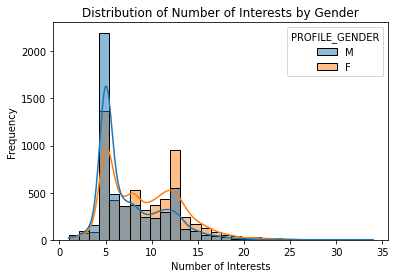

In [61]:
interest_counts_g = user_interest.groupby(['USER_ID', 'PROFILE_GENDER'])['INTEREST_ID'].nunique().reset_index()

# Plot the distribution of interest counts by gender
sns.histplot(data=interest_counts_g, x='INTEREST_ID', hue='PROFILE_GENDER', kde=True, bins=30)

# Set labels and title
plt.xlabel('Number of Interests')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Interests by Gender')

# Display the plot
plt.show()

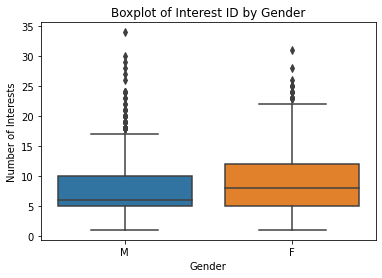

In [62]:
# Create a boxplot using seaborn
sns.boxplot(data=interest_counts_g, x='PROFILE_GENDER', y='INTEREST_ID')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Interests')
plt.title('Boxplot of Interest ID by Gender')

# Display the plot
plt.show()

In [63]:
interest_counts_g[interest_counts_g['PROFILE_GENDER'] == 'M']['INTEREST_ID'].describe()

count    5384.000000
mean        7.559621
std         3.580368
min         1.000000
25%         5.000000
50%         6.000000
75%        10.000000
max        34.000000
Name: INTEREST_ID, dtype: float64

In [64]:
interest_counts_g[interest_counts_g['PROFILE_GENDER'] == 'F']['INTEREST_ID'].describe()

count    5737.000000
mean        9.156353
std         4.034647
min         1.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        31.000000
Name: INTEREST_ID, dtype: float64

### Distribution of listed interests by age

In [65]:
interest_counts_age = user_interest.groupby(['USER_ID'])['INTEREST_ID'].nunique().reset_index()
interest_counts_age.head()

,USER_ID,INTEREST_ID
0,752420,11
1,1354022,6
2,2116134,13
3,2542079,6
4,2929622,12


In [66]:
#merge with the age label
interest_counts_age = interest_counts_age.merge(user_interest[['USER_ID', 'AgeLabel']], on = 'USER_ID', how = 'left')
interest_counts_age = interest_counts_age.drop_duplicates()

In [67]:
interest_counts_age.head()

,USER_ID,INTEREST_ID,AgeLabel
0,752420,11,35-44
13,1354022,6,25-34
19,2116134,13,35-44
32,2542079,6,35-44
38,2929622,12,35-44


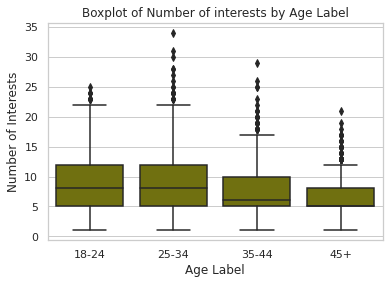

In [100]:
# Create a boxplot using seaborn
sns.boxplot(data=interest_counts_age, x='AgeLabel', y='INTEREST_ID', color = 'olive')

# Set labels and title
plt.xlabel('Age Label')
plt.ylabel('Number of Interests')
plt.title('Boxplot of Number of interests by Age Label')
plt.savefig('plot.png', transparent=True)

# Display the plot
plt.show()

In [69]:
interest_counts_age[interest_counts_age['AgeLabel'] == '18-24']['INTEREST_ID'].describe()

count    2566.000000
mean        8.736945
std         3.947977
min         1.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        25.000000
Name: INTEREST_ID, dtype: float64

In [70]:
interest_counts_age[interest_counts_age['AgeLabel'] == '25-34']['INTEREST_ID'].describe()

count    5916.000000
mean        8.575558
std         3.992792
min         1.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        34.000000
Name: INTEREST_ID, dtype: float64

In [71]:
interest_counts_age[interest_counts_age['AgeLabel'] == '35-44']['INTEREST_ID'].describe()

count    1925.000000
mean        7.861818
std         3.634356
min         1.000000
25%         5.000000
50%         6.000000
75%        10.000000
max        29.000000
Name: INTEREST_ID, dtype: float64

In [72]:
interest_counts_age[interest_counts_age['AgeLabel'] == '45+']['INTEREST_ID'].describe()

count    713.000000
mean       6.927069
std        3.176946
min        1.000000
25%        5.000000
50%        5.000000
75%        8.000000
max       21.000000
Name: INTEREST_ID, dtype: float64

### Distribution of listed interests by game mode

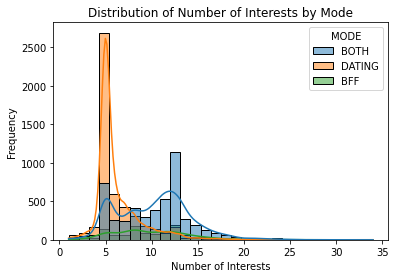

In [73]:
interest_counts_g = user_interest.groupby(['USER_ID', 'MODE'])['INTEREST_ID'].nunique().reset_index()

# Plot the distribution of interest counts by gender
sns.histplot(data=interest_counts_g, x='INTEREST_ID', hue='MODE', kde=True, bins=30)

# Set labels and title
plt.xlabel('Number of Interests')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Interests by Mode')

# Display the plot
plt.show()

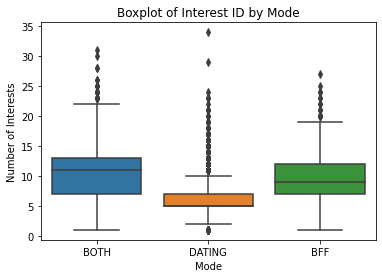

In [75]:
# Create a boxplot using seaborn
sns.boxplot(data=interest_counts_g, x='MODE', y='INTEREST_ID')

# Set labels and title
plt.xlabel('Mode')
plt.ylabel('Number of Interests')
plt.title('Boxplot of Interest ID by Mode')

# Display the plot
plt.show()

## USER BIO

In [76]:
#keep only bio data
user_bio = user_interest[['USER_ID', 'ABOUTME_TEXT', 'PROFILE_GENDER', 'AgeLabel', 'MODE']]
user_bio = user_bio.drop_duplicates()
user_bio.head()

,USER_ID,ABOUTME_TEXT,PROFILE_GENDER,AgeLabel,MODE
0,5720900,Sometimes you do wonder if anyone actually rea...,F,35-44,BFF
11,4066793596,Constantemente tratando de leer mas y ser mas ...,F,25-34,BFF
24,3358809036,From London ❤️‍🩹,F,18-24,BFF
35,284320279,Canadian import relocating for the sunny weath...,F,25-34,BFF
48,1497692909,"You know what, let’s just meet for a drink and...",F,25-34,BFF


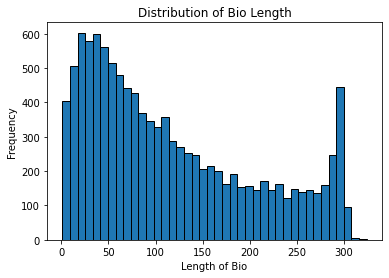

In [77]:
#get the length of each bio
user_bio['len_bio'] = user_bio.apply(lambda x: len(x.ABOUTME_TEXT), axis = 1)
user_bio.head()

#plot the distirbution of th elength of the bio
plt.hist(user_bio['len_bio'], bins=40, edgecolor='black')
plt.xlabel('Length of Bio')
plt.ylabel('Frequency')
plt.title('Distribution of Bio Length')
plt.show()

Seems like 300 characters is the limit for Bumble's bio and this is why we see the peak at 300 characters. Some bios are exceeding 300 characters and this is due to how some of the emoji's are being counted here in Python. 

### Bio Lenght Distribution by Gender

In [78]:
#Female Users
user_bio[user_bio['PROFILE_GENDER'] == 'F']['len_bio'].describe()

count    5737.000000
mean      121.277323
std        89.221155
min         1.000000
25%        46.000000
50%        98.000000
75%       186.000000
max       324.000000
Name: len_bio, dtype: float64

In [79]:
#Male Users
user_bio[user_bio['PROFILE_GENDER'] == 'M']['len_bio'].describe()

count    5384.000000
mean      111.086367
std        86.962103
min         1.000000
25%        40.000000
50%        84.000000
75%       168.000000
max       310.000000
Name: len_bio, dtype: float64

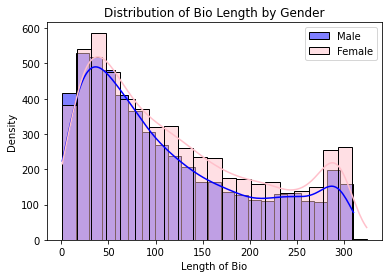

In [80]:
male_len_bio = user_bio[user_bio['PROFILE_GENDER'] == 'M']['len_bio']
female_len_bio = user_bio[user_bio['PROFILE_GENDER'] == 'F']['len_bio']

# Plotting the distribution of male and feamle bio lengths
sns.histplot(male_len_bio, color='blue', label='Male', kde=True)
sns.histplot(female_len_bio, color='pink', label='Female', kde=True)

plt.xlabel('Length of Bio')
plt.ylabel('Density')
plt.title('Distribution of Bio Length by Gender')
plt.legend()
plt.show()

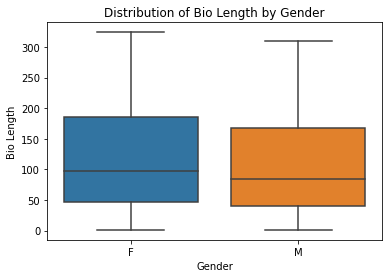

In [81]:
sns.boxplot(x='PROFILE_GENDER', y='len_bio', data=user_bio)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Bio Length')
plt.title('Distribution of Bio Length by Gender')

# Display the plot
plt.show()

On average female tend to write a slightly longer bio compared to males. The overall distribution seems to be the same.

### Bio Length Distribution by Age

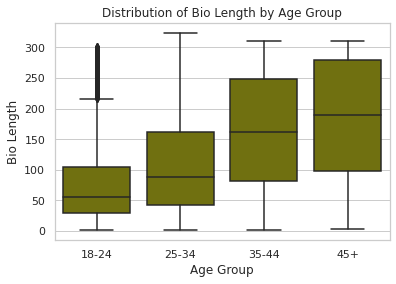

In [98]:
sns.set(style='whitegrid')
sns.boxplot(x='AgeLabel', y='len_bio', data=user_bio, color = 'olive')

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Bio Length')
plt.title('Distribution of Bio Length by Age Group')
plt.savefig('plot.png', transparent=True)
# Display the plot
plt.show()

Older users seem to write longer bios, yet include less number of interests

### Bio Length Distribution by Mode

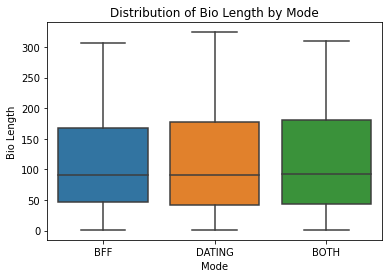

In [83]:
sns.boxplot(x='MODE', y='len_bio', data=user_bio)

# Set labels and title
plt.xlabel('Mode')
plt.ylabel('Bio Length')
plt.title('Distribution of Bio Length by Mode')

# Display the plot
plt.show()

## Demopgraphics

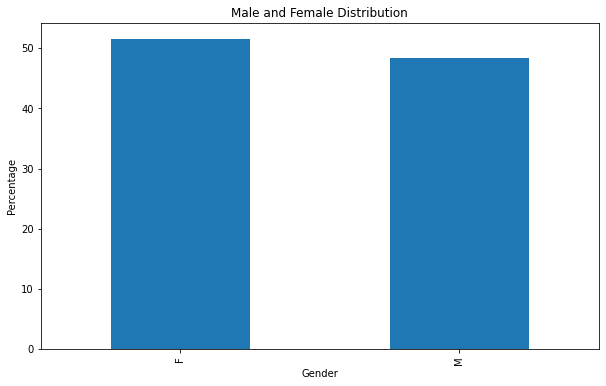

In [86]:
# Calculate the count of each gender
gender_counts = user_df['PROFILE_GENDER'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

# Create a bar plot of gender distribution
gender_percentages.plot(kind='bar', figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Male and Female Distribution')

# Display the plot
plt.show()

### Gender Distribution by Mode

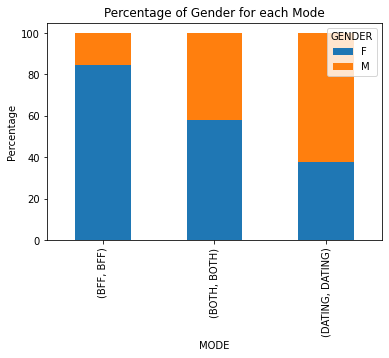

In [88]:
mode_gender_counts = user_df.groupby(['MODE', 'PROFILE_GENDER']).size()
mode_gender_percentage = mode_gender_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Plotting the results
mode_gender_percentage.unstack().plot(kind='bar', stacked=True)

plt.xlabel('MODE')
plt.ylabel('Percentage')
plt.title('Percentage of Gender for each Mode')
plt.legend(title='GENDER')
plt.show()

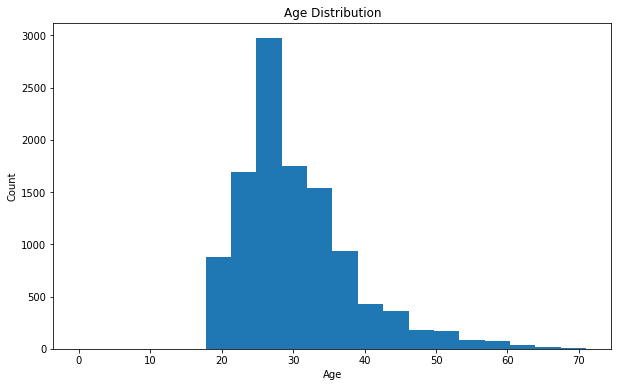

In [87]:
user_df['PROFILE_AGE'].plot(kind='hist', bins=20, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Display the plot
plt.show()

### Age Distribution by Mode

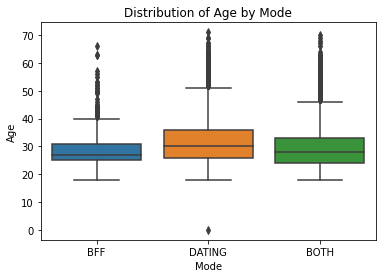

In [92]:
sns.boxplot(x='MODE', y='PROFILE_AGE', data=user_df)

# Set labels and title
plt.xlabel('Mode')
plt.ylabel('Age')
plt.title('Distribution of Age by Mode')

# Display the plot
plt.show()